# Simple Fun #27: Rectangle Rotation

[Kata на Codewars.com](https://www.codewars.com/kata/5886e082a836a691340000c3)

## Задача. 
Определить количество точек в координатах, заданных целыми числами, находящихся внутри прямоугольника. Прямоугольник в картезианских координатах задан сторонами a и b. Центр прямоугольника (пересечение диагоналей) расположен в точке начала координат (0,0), но стороны не параллельны осям, а повернуты на угол 45 градусов.

Например, для прямоугольника со сторонами 6 и 4 (рисунок ниже) количество точек равно 23.

![Caption](./blob37_.png)

Применим линейную алгебру в данной задаче. Повернутый прямоугольник можно получить из обычного, расположенного в начале координат, сдвинув его и повернув через матрицу поворота.

In [26]:
import numpy as np
import matplotlib.pylab as plt

#a = int(input("Введите высоту - длину стороны вдоль оси y, a = "))
#b = int(input("Введите ширину - длину стороны вдоль оси х, b = "))
a = 6 # высота - длина стороны вдоль оси y
b = 4 # ширина - длина стороны вдоль оси x

In [27]:
M = np.array([[0,0],[0,a],[b,a],[b,0]]) # матрица - координаты вершин прямоугольника в начале координат
v_shift = [b/2, a/2] # вектор сдвига центра в начало координат
M2 = M - v_shift # прямоугольник с центром в начале координат

In [28]:
fi = -45*np.pi/180 # угол по часовой стрелке
R = np.array([[np.cos(fi), np.sin(fi)],[-np.sin(fi), np.cos(fi)]]) # матрица поворота
M3 = M2.dot(R) # прямоугольник с поворотом

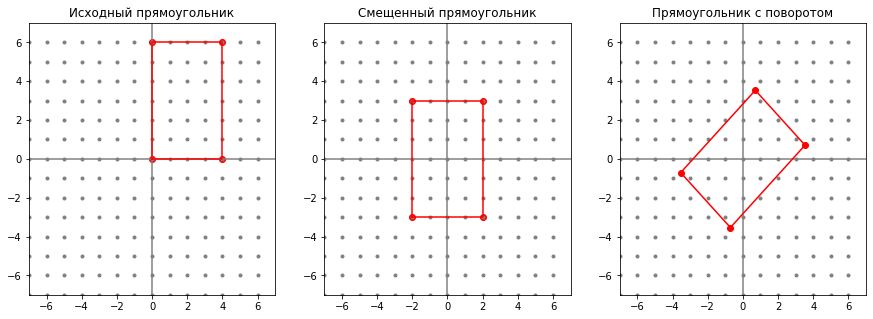

In [29]:
limits = [-7,7]
xv, yv = np.meshgrid(np.arange(*limits), np.arange(*limits))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5))

M_ = np.append(M,[M[0]],axis=0)
ax1.set(xlim=limits, ylim=limits, title='Исходный прямоугольник')
ax1.hlines(0,*limits,color='grey')
ax1.vlines(0,*limits,color='grey')
ax1.scatter(M[:,0], M[:,1], marker='o', color='red')
ax1.scatter(xv, yv, color='grey', marker='.')
ax1.plot(M_[:,0], M_[:,1], 'r-')

M2_ = np.append(M2,[M2[0]],axis=0)
ax2.set(xlim=limits, ylim=limits, title='Смещенный прямоугольник')
ax2.hlines(0,*limits,color='grey')
ax2.vlines(0,*limits,color='grey')
ax2.scatter(M2[:,0], M2[:,1], marker='o', color='red')
ax2.scatter(xv, yv, color='grey', marker='.')
ax2.plot(M2_[:,0], M2_[:,1], 'r-')

M3_ = np.append(M3,[M3[0]],axis=0)
ax3.set(xlim=limits, ylim=limits, title='Прямоугольник с поворотом')
ax3.hlines(0,*limits,color='grey')
ax3.vlines(0,*limits,color='grey')
ax3.scatter(M3[:,0], M3[:,1], marker='o', color='red')
ax3.scatter(xv, yv, color='grey', marker='.')
ax3.plot(M3_[:,0], M3_[:,1], 'r-')

#plt.axis('tight')
plt.show()

Зная координаты вершин повернутого прямоугольника, можно определить формулы линий, формирующих его стороны. Затем перебором точек посчитать, сколько их попадает внутрь прямоугольника, ограниченного наклонными прямыми.

Обратите внимание, что посчитать точки внутри исходного прямоугольника гораздо проще. Ведь он ограничен горизонтальными и вертикальными линиями, и одна из вершин лежит в начале координат. Поэтому предлагаю проверять принадлежность точек прямоугольнику обратным преобразованием. Алгоритм:
* примем кандидатами на проверку все серые точки на правом рисунке
* повернем эти точки на угол, противоположный повороту прямоугольника
* сместим точки по вектору, противоположному вектору сдвига прямоугольника
* посчитаем количество точек, попавших внутрь прямоугольника

Продемонстрируем на примере двух точек A и B с координатами (2,1) и (2,-1). Первая точка внутри прямоугольника, вторая - снаружи.

In [30]:
P = np.array([[2,1],[2,-1]]) # массив точек
R_ = np.transpose(R) # матрица обратного поворота
P2 = P.dot(R_)
P3 = P2 + v_shift # точки в исходных координатах

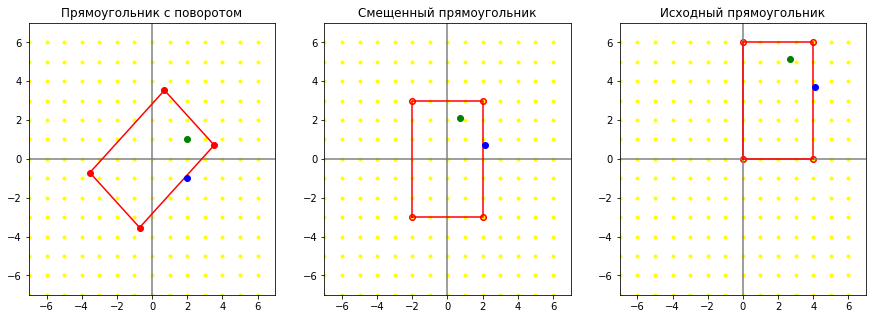

In [31]:
fig, (ax3, ax2, ax1) = plt.subplots(1, 3, figsize = (15,5))

ax1.set(xlim=limits, ylim=limits, title='Исходный прямоугольник')
ax1.hlines(0,*limits,color='grey')
ax1.vlines(0,*limits,color='grey')
ax1.scatter(M[:,0], M[:,1], marker='o', color='red')
ax1.scatter(xv, yv, color='yellow', marker='.')
ax1.plot(M_[:,0], M_[:,1], 'r-')
ax1.plot(*P3[0], 'go')
ax1.plot(*P3[1], 'bo')

ax2.set(xlim=limits, ylim=limits, title='Смещенный прямоугольник')
ax2.hlines(0,*limits,color='grey')
ax2.vlines(0,*limits,color='grey')
ax2.scatter(M2[:,0], M2[:,1], marker='o', color='red')
ax2.scatter(xv, yv, color='yellow', marker='.')
ax2.plot(M2_[:,0], M2_[:,1], 'r-')
ax2.plot(*P2[0], 'go')
ax2.plot(*P2[1], 'bo')

ax3.set(xlim=limits, ylim=limits, title='Прямоугольник с поворотом')
ax3.hlines(0,*limits,color='grey')
ax3.vlines(0,*limits,color='grey')
ax3.scatter(M3[:,0], M3[:,1], marker='o', color='red')
ax3.scatter(xv, yv, color='yellow', marker='.')
ax3.plot(M3_[:,0], M3_[:,1], 'r-')
ax3.plot(*P[0], 'go')
ax3.plot(*P[1], 'bo')

plt.show()

Очевидно, что точки сохраняют свое положение относительно фигуры: зеленая находится внутри, а синяя - снаружи. Теперь проверим все серые точки.

In [32]:
N = np.c_[xv.ravel(),yv.ravel()] # массив точек
N2 = N.dot(R_)
N3 = N2 + v_shift

# подсчет точек внутри прямоугольника
f1, f2, f3, f4 = (N3[:,0]>=0, N3[:,1]>=0, N3[:,0]<=b, N3[:,1]<=a)
f = f1 & f2 & f3 & f4
print("Точек внутри прямоугольника: ", sum(f))

Точек внутри прямоугольника:  23


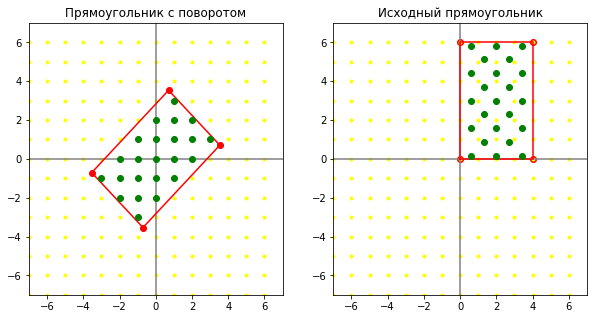

In [33]:
fig, (ax3, ax1) = plt.subplots(1, 2, figsize = (10,5))

ax1.set(xlim=limits, ylim=limits, title='Исходный прямоугольник')
ax1.hlines(0,*limits,color='grey')
ax1.vlines(0,*limits,color='grey')
ax1.scatter(M[:,0], M[:,1], marker='o', color='red')
ax1.scatter(xv, yv, color='yellow', marker='.')
ax1.plot(M_[:,0], M_[:,1], 'r-')
ax1.plot(N3[f,0], N3[f,1], 'go')

ax3.set(xlim=limits, ylim=limits, title='Прямоугольник с поворотом')
ax3.hlines(0,*limits,color='grey')
ax3.vlines(0,*limits,color='grey')
ax3.scatter(M3[:,0], M3[:,1], marker='o', color='red')
ax3.scatter(xv, yv, color='yellow', marker='.')
ax3.plot(M3_[:,0], M3_[:,1], 'r-')
ax3.plot(N[f,0], N[f,1], 'go')

plt.show()